Aplicarle al GridSearch y variar profundidad y criterio de bondad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
print(df.shape)

(1728, 7)


In [ ]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify=y)

In [ ]:
y_train.shape, y_test.shape

((1209,), (519,))

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
101,vhigh,vhigh,5more,more,small,high
844,high,low,5more,2,big,med
1361,low,vhigh,4,4,small,high
1584,low,med,4,more,small,low
566,high,high,2,more,big,high


In [ ]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

#Resumen de los datos

Se tienen 7 variables, todas del tipo categorico.

Compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.

La clase es el target




In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
101,1,1,1,1,1,1
844,2,2,1,2,2,2
1361,3,1,2,3,1,1
1584,3,3,2,1,1,3
566,2,4,3,1,2,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

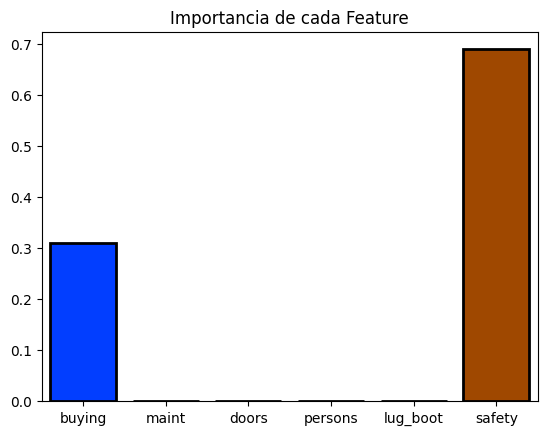

In [ ]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x= columns,y=importances, palette='bright', saturation=2, edgecolor = 'black', linewidth=2)
plt.title("Importancia de cada Feature")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("El accuracy en train es: ", train_accuracy_tree)
print("El accuracy en test es: ", test_accuracy_tree)

El accuracy en train es:  0.7005789909015715
El accuracy en test es:  0.6994219653179191


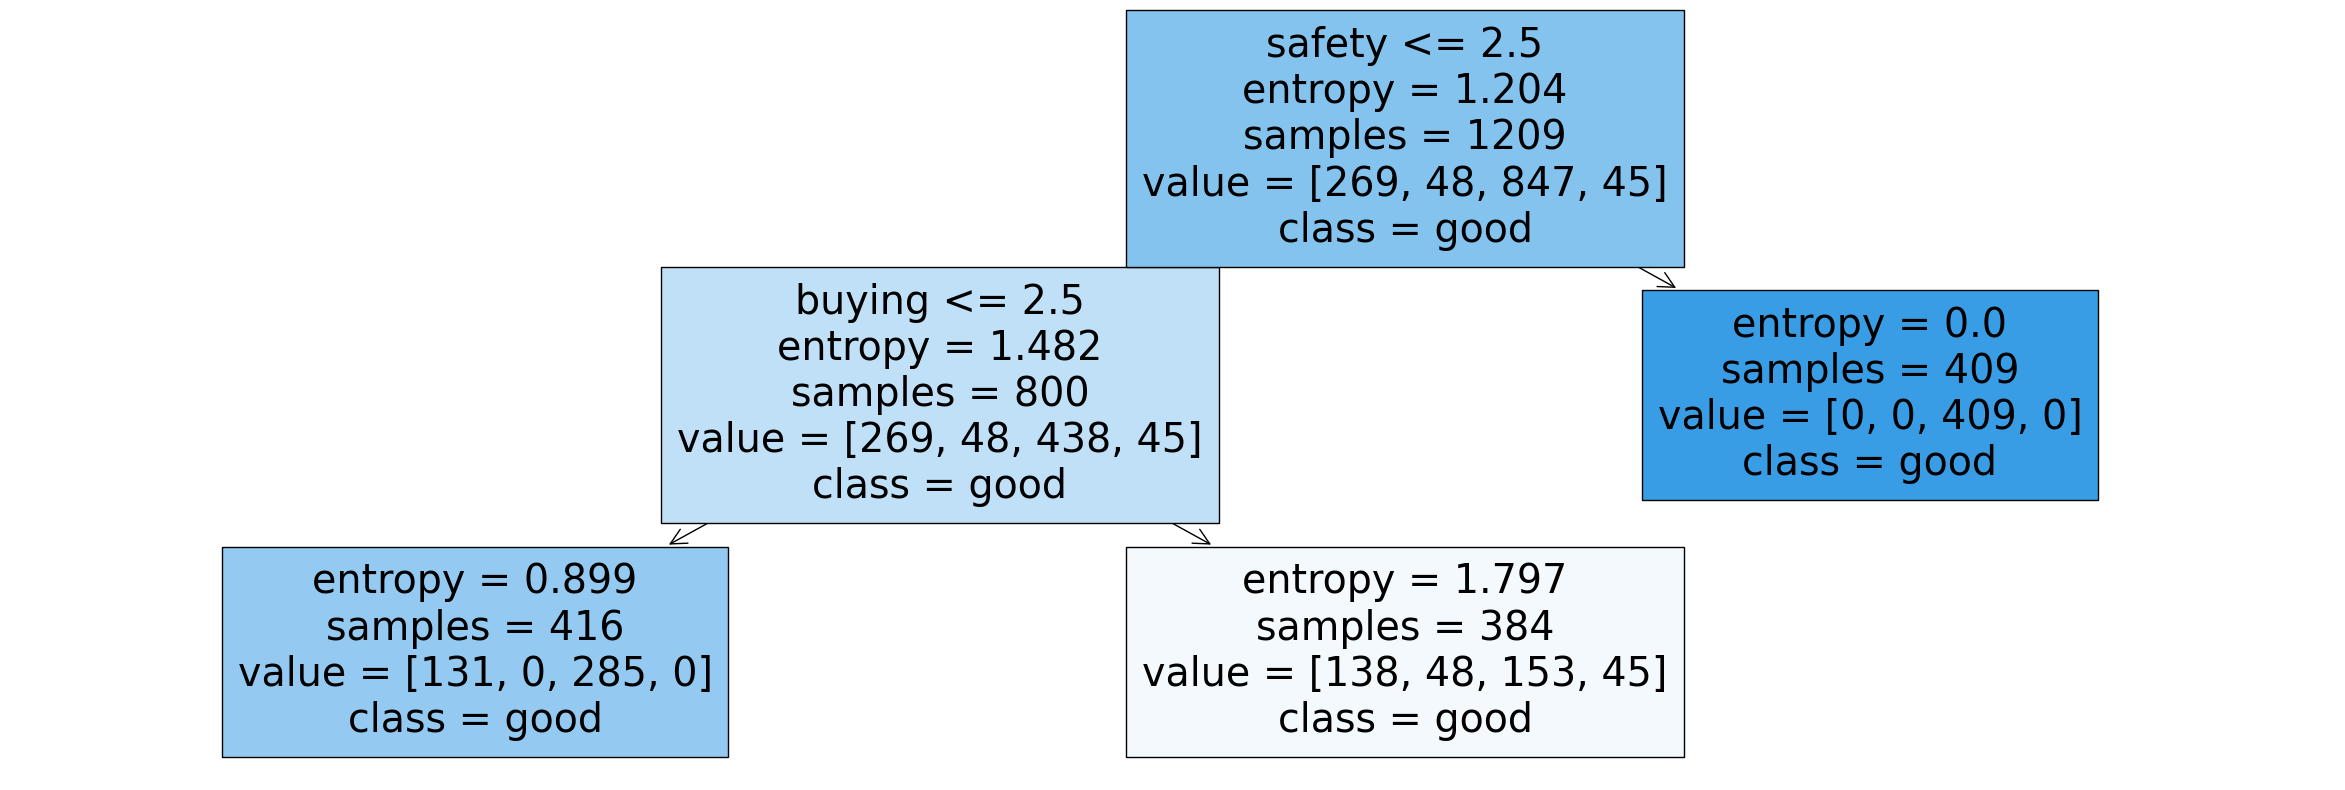

In [ ]:
plt.figure(figsize=(30,10))

plot_tree(tree,
          feature_names = X.columns,
          class_names = ['unacc', 'acc', 'good', 'vgood'],
          filled=True)
plt.show()  # Asegúrate de agregar esta línea para mostrar el gráfico


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
test_accuracy = best_tree.score(X_test, y_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
print("Test Set Accuracy:", test_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Score: 0.9321525324920271
Test Set Accuracy: 0.9421965317919075


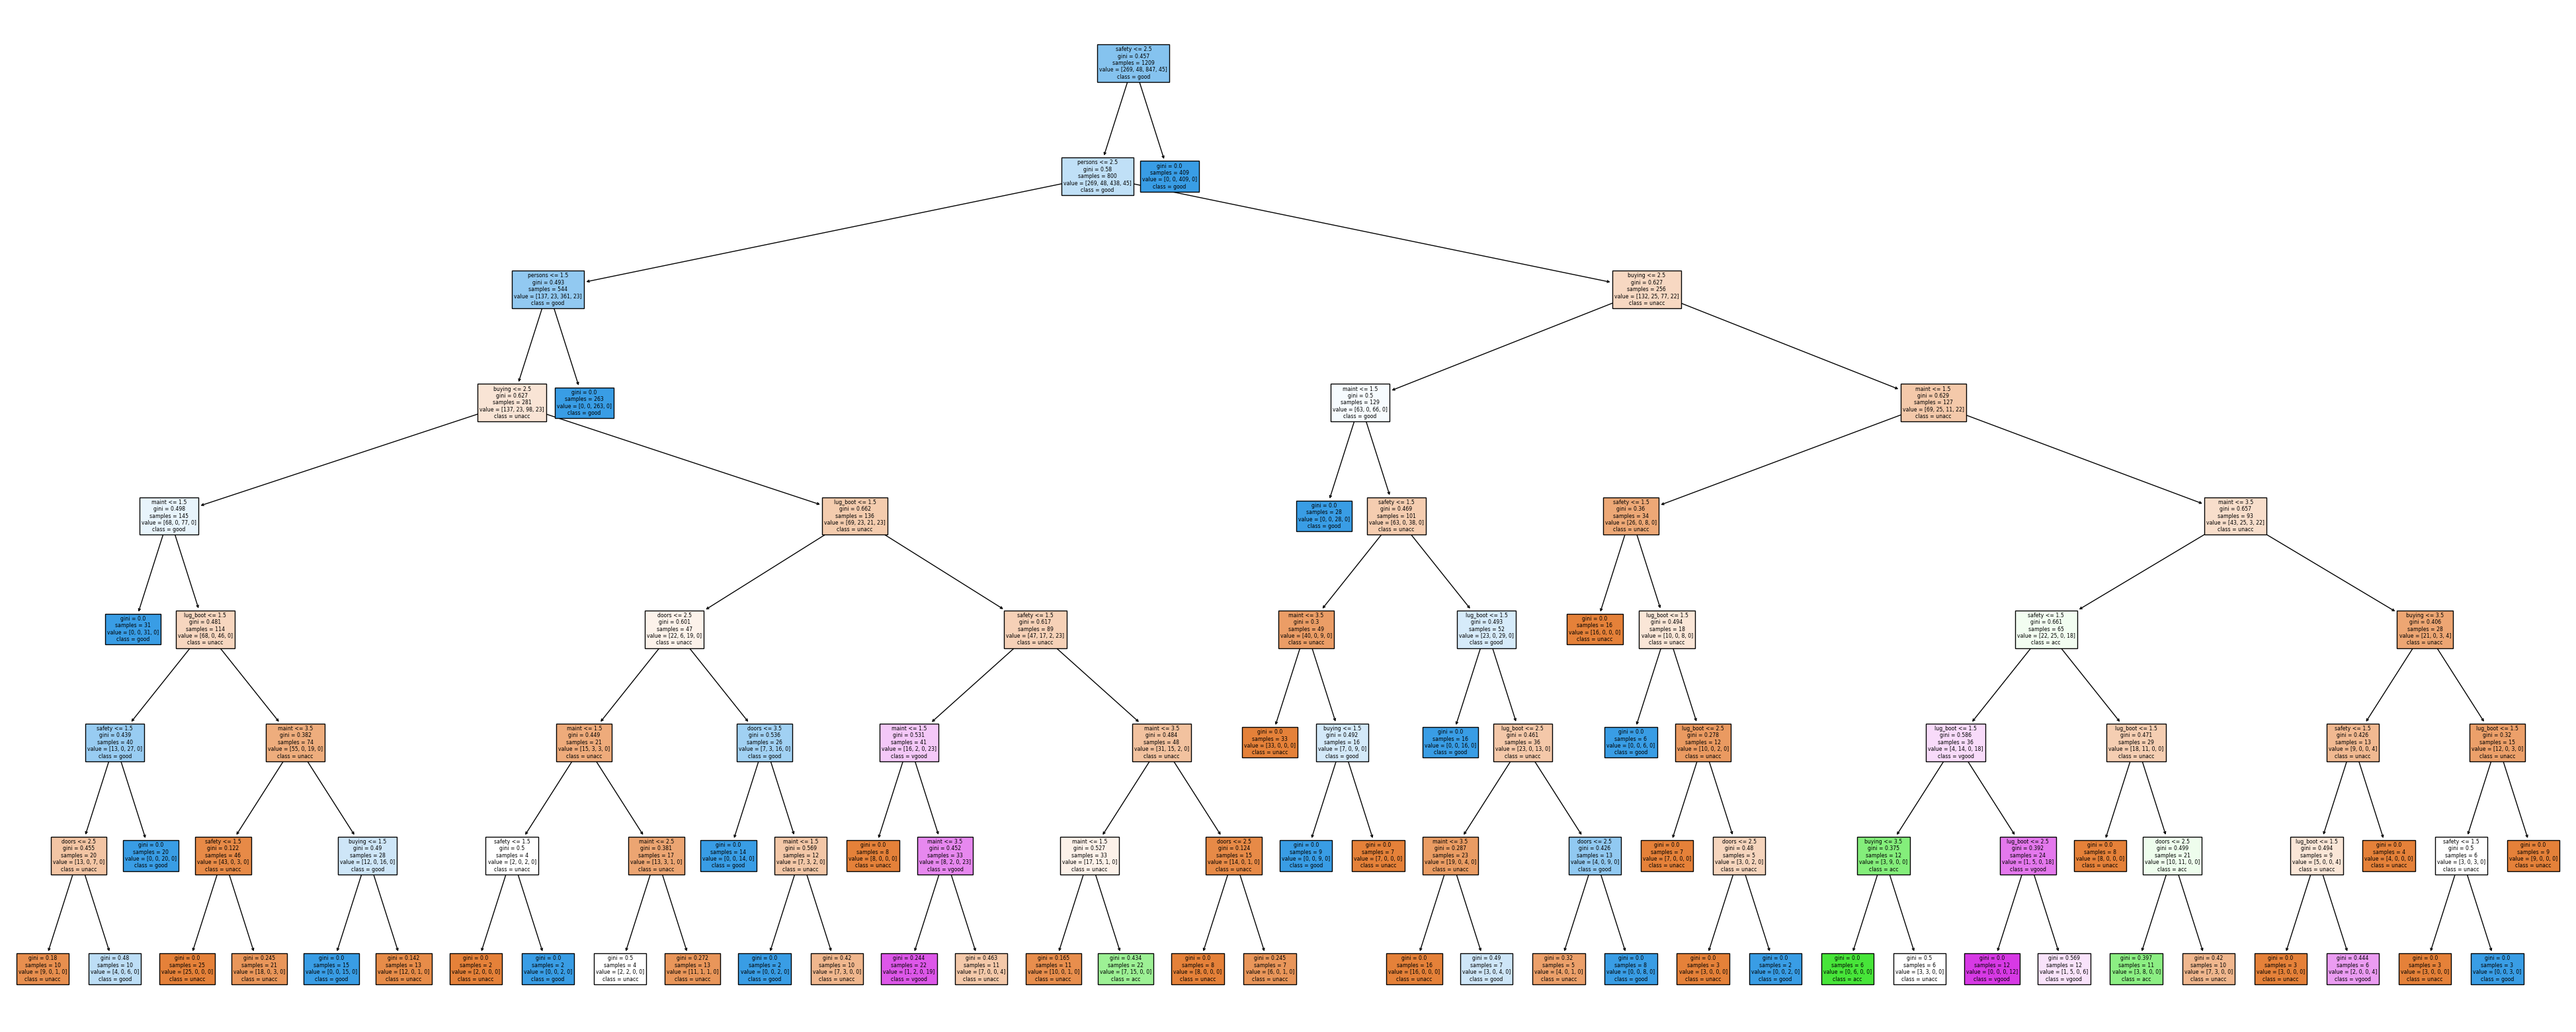

In [ ]:
plt.figure(figsize=(50,20))

plot_tree(best_tree,
          feature_names = X.columns,
          class_names = ['unacc', 'acc', 'good', 'vgood'],
          filled=True)
plt.show()  # Asegúrate de agregar esta línea para mostrar el gráfico